In [2]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
from torchvision.datasets import CocoDetection
from skimage.io import imsave

In [8]:
ann_path = 'annotations/instances_val2017.json'
img_path = 'val2017'
dataset = CocoDetection(img_path, ann_path)

loading annotations into memory...
Done (t=0.53s)
creating index...
index created!


In [65]:
#os.rmdir('val2017_supp', )
#ar = []
ar_img = []
for idx, (X, y_list) in enumerate(dataset):
    X = np.array(X)
    h, w, _ = X.shape
    if h * w > 0:
        ar_img.append(h / w)
    continue
    for y in y_list:
        x1, y1, dx, dy = map(int, y['bbox'])
        if dx * dy < 5:
            continue
        ar.append(dy / dx)

(array([4.700e+01, 3.555e+03, 1.127e+03, 2.650e+02, 5.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. ]),
 <BarContainer object of 8 artists>)

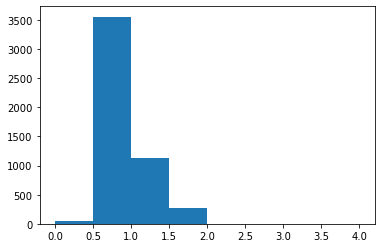

In [68]:
plt.hist(ar_img, bins=8, range=(0, 4))

(array([ 4848., 10229.,  7877.,  4810.,  3270.,  2219.,  1405.,   858.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. ]),
 <BarContainer object of 8 artists>)

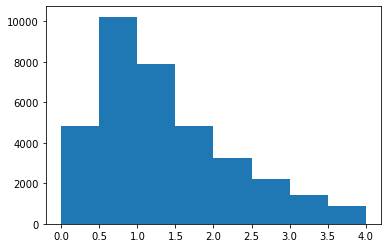

In [69]:
plt.hist(ar, bins=8, range=(0, 4))

(array([7347., 7346., 7337., 7367., 7350.]),
 array([ 0.        ,  0.62162162,  0.97058824,  1.41666667,  2.20218579,
        26.        ]),
 <BarContainer object of 5 artists>)

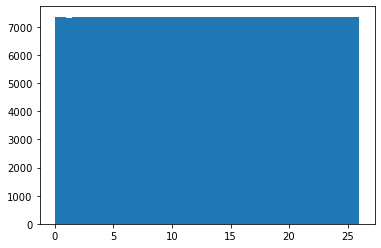

In [87]:
bin_count = 5
n = len(ar)
bin_edges = [0]
ar = np.sort(ar)
for i in range(1, bin_count):
    bin_edges.append(ar[i * n // bin_count])
bin_edges.append(ar[-1])
plt.hist(ar, bins=bin_edges)

[0, 0.6671875, 0.75, 1.0, 2.6016260162601625]


(array([ 904., 1136., 1562., 1398.]),
 array([0.        , 0.6671875 , 0.75      , 1.        , 2.60162602]),
 <BarContainer object of 4 artists>)

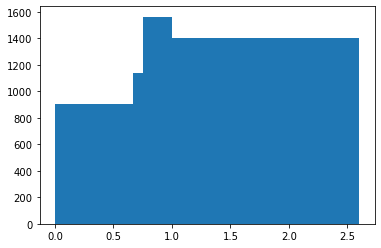

In [86]:
bin_count = 4
n = len(ar_img)
bin_edges = [0]
ar_img = np.sort(ar_img)
for i in range(1, bin_count):
    bin_edges.append(ar_img[i * (n // bin_count)])
bin_edges.append(ar_img[-1])
print(bin_edges)
plt.hist(ar_img, bins=bin_edges)

In [41]:
inst

array([], shape=(0, 5, 3), dtype=uint8)

In [42]:
x1, y1, dx, dy

(205, 381, 5, 0)

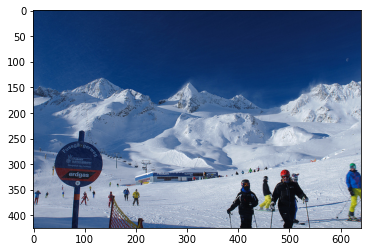

In [43]:
plt.imshow(X)

In [45]:
np.prod(inst.shape) > 25

False

In [49]:
import coco_dataset

In [1]:
ds = coco_dataset.CocoDataset('val2017', 'annotations/instances_val2017.json', 'val2017_supp')


NameError: name 'coco_dataset' is not defined

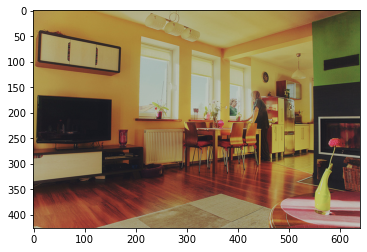

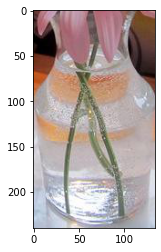

[241.24 194.99  14.22  17.63]


In [59]:
for item in ds:
    plt.imshow(item['images'])
    plt.show()
    plt.imshow(item['supports'])
    plt.show()
    print(item['bbox'])
    break

In [2]:
import coco_dataset

In [ ]:
ds = coco_dataset.CocoDataset('val2017', 'annotations/instances_val2017.json', 'val2017_supp')
ds_loader = torch.utils.data.DataLoader(ds, batch_size=32, collate_fn=coco_dataset.my_collate, shuffle=True)
for idx, item in enumerate(ds_loader):
    print(item.keys())
    print(item['images'].shape, item['supports'].shape, item['bbox'].shape)
    if idx == 3:
        break